# Facial Expression Classfication App - Rui Li

## Preview

* Goal and Explanation
* The Final Application
* Preview of data
* Training
* Visualizing the model accuracy and model loss
* Reference 

*FER2013 Dataset*

Dataset from https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data 

Image Properties: 48 x 48 pixels (2304 bytes) labels: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral The training set consists of 28,709 examples. The public test set consists of 3,589 examples. The private test set consists of another 3,589 examples.


*Some indication:*

*Before the start our course, I had experience programming in languages including: (Python, Java, R, C, JavaScript, etc.) and had defined/written my own functions or methods and also defined my own classes or objects.*

*data source and some other references are listed in the reference at the bottom*

### 1.Goal and Explanation

* The dataset example

<img src="examples of FER2013 Dataset.png" width="700">


* An image of final application example


<img src="larry_expression.png" width="900">


**Objective**

To develop a program that can detect facial expression and link it to emotion. I think this is very useful for emotion recognition. 

*This jupyter file contains how to use the pretrained model and the process of training the model.*

### 2.Application: Emotion classifier

(1) input: a picture of expression

(2) output: the prediction of the emotion

(3) model: a pretrained model (training process in the next part)

*ps. If you are running on the TensorFlow or CNTK backends, your code will automatically run on GPU if any available GPU is detected.
The codes below is based on the TensorFlow backends by default.*

In [3]:
"""
visualize results for test image
"""
# import all the necessary python packages for reading image, reading the model and ploting
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# using the keras by default
# in my environment, it is CUDA 10.0, tensorflow 1.14.0, python 3.7
from keras.models import model_from_json, load_model
from skimage import io
from keras.preprocessing import image
import os

# this is the pretrained model 
trained_model = load_model('the_pretrained_model_epoch20.h5')
# trained_model = load_model('model_expression.h5')


def expression_classifier():
    
    # this is for the input image
    print("Put in your expression picture in the directory test_images")
    print("these are all the pictures in the directory: test_images")
    print(os.listdir("./test_images"))
    image_name = input("enter the name of the pic you want to test; remember to also type in the .jpg or png")
    image_path = './test_images/'+image_name
    
    #  Output: The first plot: Raw Image
    raw_img = io.imread(image_path)
    plt.rcParams['figure.figsize'] = (13.5,5.5)
    axes=plt.subplot(1, 2, 1)
    plt.imshow(raw_img)
    plt.xlabel('Input Image', fontsize=16)
    axes.set_xticks([])
    axes.set_yticks([])
    plt.tight_layout()

    # Prediction
    plt.subplots_adjust(left=0.05, bottom=0.2, right=0.95, top=0.9, hspace=0.02, wspace=0.3)
    plt.subplot(1, 2, 2)
    img = image.load_img(image_path, grayscale=True, target_size=(48, 48))
    
    # Output: Bar plot (the second plot)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x /= 255
    custom = trained_model.predict(x)
    emotions = custom[0]
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.xlabel("The Expression is %s" %str(objects[list(emotions).index(max(list(emotions)))]).upper(),fontsize=25)
    plt.title('emotion')
    plt.tight_layout()
    print("The Expression is %s" %str(objects[list(emotions).index(max(list(emotions)))]))


Put in your expression picture in the directory test_images
these are all the pictures in the directory: test_images
['laodou.png', 'laodou1.png', 'laodou2.png', 'laodou3.png', 'larry.png', 'ng1.jpg', 'unhappybaby.jpg']
enter the name of the pic you want to test; remember to also type in the .jpg or pnglaodou1.png
The Expression is happy


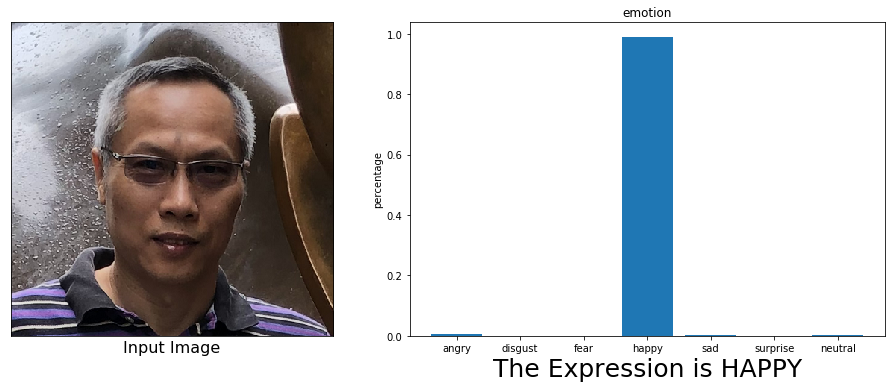

In [9]:
expression_classifier()

### 3.1 Preview of the data

Process:

<img src="1.png" width="700">

In [7]:
# import packages for loading the dataset fer2013(a facial expression dataset)
import numpy as np 
import pandas as pd 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# data processing, CSV file I/O (e.g. pd.read_csv)
# Input data file (fer2013 dataset) 

filname = 'fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv(filname,names=names, na_filter=False)
im=df['pixels']
print(df.head(10))


   emotion                                             pixels     usage
0  emotion                                             pixels     Usage
1        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
2        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
3        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
4        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
5        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
6        2  55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...  Training
7        4  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...  Training
8        3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...  Training
9        3  85 84 90 121 101 102 133 153 153 169 177 189 1...  Training


In [4]:
# this is the function for processing the data into X and Y
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])
    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)
# X.shape (35887, 2304)
# reshape X into the desired dimensions
N, D = X.shape
X = X.reshape(N, 48, 48, 1)
# X.shape

7


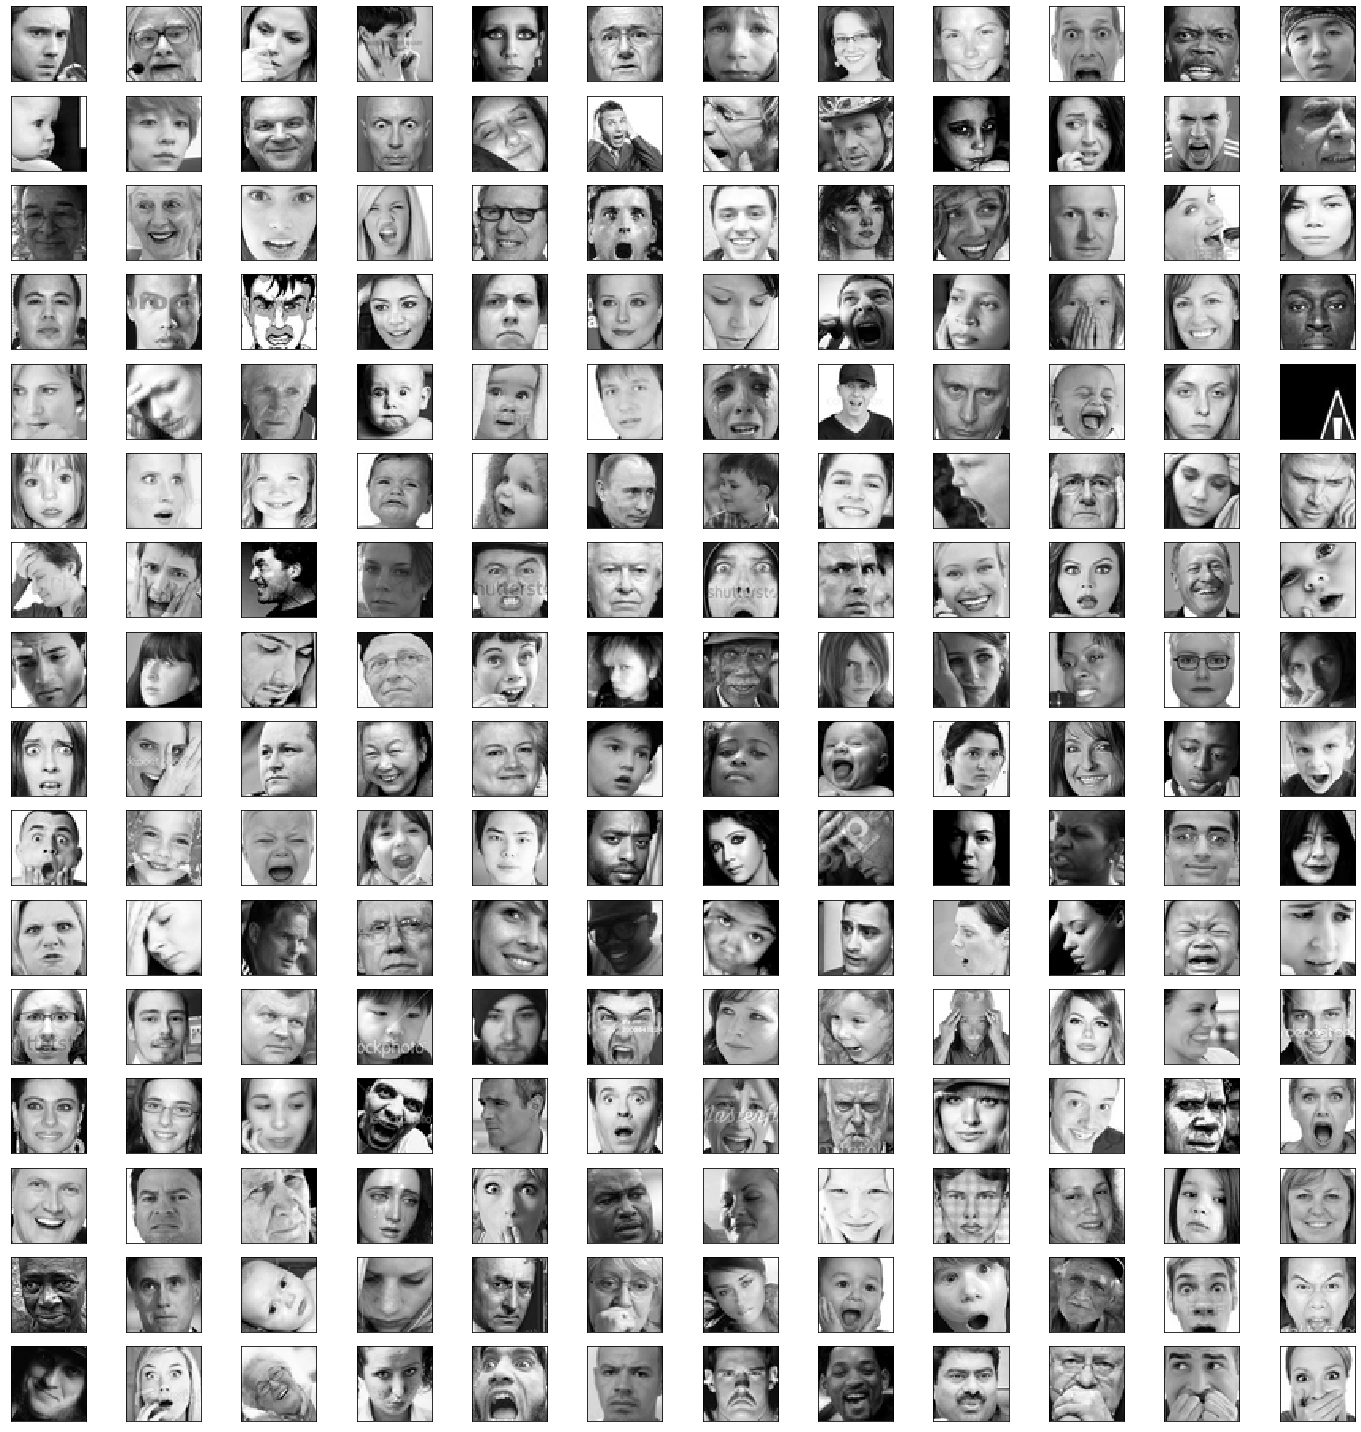

In [5]:
def overview(start, end, X):
    """
    The function is used to plot first several pictures for overviewing inputs format
    """
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end+1):
        input_img = X[i:(i+1),:,:,:]
        ax = fig.add_subplot(16,12,i+1)
        ax.imshow(input_img[0,:,:,0], cmap=plt.cm.gray)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()
overview(0,191, X)

(1, 48, 48, 1)


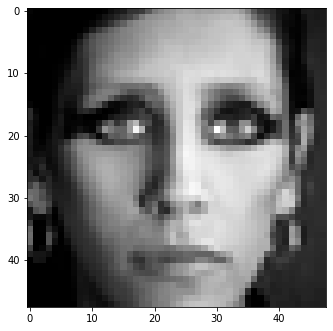

In [6]:
input_img = X[4:5,:,:,:] 
print (input_img.shape)
plt.imshow(input_img[0,:,:,0], cmap='gray')
plt.show()

### 3.2 Training

##### CNN Layer Set

In [4]:
from keras.utils import plot_model
# trained_model = load_model('model_expression.h5')
trained_model = load_model('the_pretrained_model_epoch20.h5')
#  Should install GraphViz in this step and ensure that its executables are in the $PATH.
# plot_model(trained_model, to_file='model_expression.png')
plot_model(trained_model, to_file='model_model.png')


* The picture of the model: (code above)
<img src="model.png" width="400">


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers.normalization import BatchNormalization

def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    
    return model
model=my_model()
# The Architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       512       
__________

### Finally! The training begins!

# Warning! Good people! It might take a bit long time to run this step if not using GPU

In [8]:
path_model='model_expression.h5' # save model at this location after each epoch
K.tensorflow_backend.clear_session() # destroys the current graph and builds a new one
model=my_model() # create the model
K.set_value(model.optimizer.lr,1e-3) # set the learning rate
# fit the model
history=model.fit(x=X_train,     
            y=y_train, 
            batch_size=64, 
            epochs=20, 
            verbose=1, 
            validation_data=(X_test,y_test),
            shuffle=True,
            callbacks=[
                ModelCheckpoint(filepath=path_model),
            ]
            )

Train on 32298 samples, validate on 3589 samples
Epoch 1/20
32298/32298 [==============================] - 83s 3ms/step - loss: 1.6524 - acc: 0.3619 - val_loss: 1.4280 - val_acc: 0.4522
Epoch 2/20
32298/32298 [==============================] - 78s 2ms/step - loss: 1.3010 - acc: 0.5033 - val_loss: 1.3849 - val_acc: 0.4765
Epoch 3/20
32298/32298 [==============================] - 77s 2ms/step - loss: 1.1195 - acc: 0.5796 - val_loss: 1.1641 - val_acc: 0.5531
Epoch 4/20
32298/32298 [==============================] - 76s 2ms/step - loss: 0.9920 - acc: 0.6316 - val_loss: 1.1017 - val_acc: 0.5829
Epoch 5/20
32298/32298 [==============================] - 77s 2ms/step - loss: 0.8712 - acc: 0.6768 - val_loss: 1.1308 - val_acc: 0.5821
Epoch 6/20
32298/32298 [==============================] - 76s 2ms/step - loss: 0.7260 - acc: 0.7334 - val_loss: 1.1511 - val_acc: 0.5918
Epoch 7/20
32298/32298 [==============================] - 78s 2ms/step - loss: 0.5622 - acc: 0.7961 - val_loss: 1.2866 - val_acc:

In [27]:
# save the history for later use

# method 1
# import pickle
# with open('/trainHistoryDict.txt', 'wb') as file_pi:
#     pickle.dump(history.history, file_pi)

# method 2
import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history
# Save it under the form of a json file
json.dump(history_dict, open("trainHistoryDict.json", 'w'))
print(history_dict['loss'])

[1.6523512922224153, 1.3010347802555298, 1.1195297345663935, 0.9920307688576067, 0.8712031991166281, 0.7260414739756165, 0.5621824558194307, 0.41191538352849383, 0.28474593554143085, 0.2033206407861729, 0.1453572019867295, 0.1402310108841739, 0.12036337609255718, 0.11293436192989689, 0.09919682996890458, 0.10082613619992413, 0.08658731534234643, 0.08042366264510342, 0.08311961923149601, 0.07635098764406091]


### 3.2 Visualizing the model accuracy and model loss

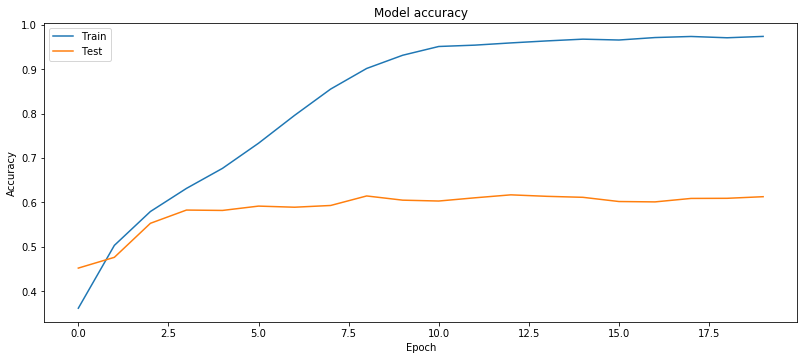

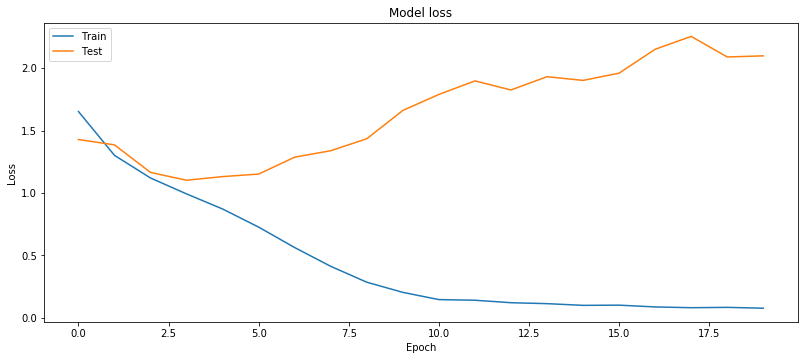

In [15]:
# model = trained_model


import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Use the saved history

In [3]:
# # model = trained_model
# import matplotlib.pyplot as plt


# # load the saved history dict and use it for evaluation
# # history_dict = json.load(open("trainHistoryDict.json", 'r'))

# # Plot training & validation accuracy values
# plt.plot(history_dict['acc'])
# plt.plot(history_dict['val_acc'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# # Plot training & validation loss values
# plt.plot(history_dict['loss'])
# plt.plot(history_dict['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()



# # this plot_model function works if you install graph
# # from keras.utils import plot_model
# # # trained_model = load_model('model_expression.h5')
# # trained_model = load_model('the_pretrained_model_epoch20.h5')
# # plot_model(trained_model, to_file='model.png')




### 4.Reference


* data;

FER2013 Dataset from 

https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data 


#### code reference (keras documents):

* To use the model in keras:

https://keras.io/models/sequential/

https://keras.io/getting-started/sequential-model-guide/

* To run Keras on GPU:

https://keras.io/getting-started/faq/

https://www.tensorflow.org/install/gpu

* inspiration from:

"AU-inspired Deep Networks for Facial Expression Feature Learning" by Mengyi Liu, Shaoxin Li, Shiguang Shan, Xilin Chen 

"Visual Saliency Maps Can Apply to Facial Expression Recognition" by Zhenyue Qin, Jie Wuy, Yang Liu, and Tom Gedeon
